Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
count = 0
n = 1000000000

for num in range(2, n):
    prime = True
    for i in range(2, num):
        if (num % i == 0):
            prime = False
    if prime:
        count = count + 1


        if count % 2 != 0: #Saves half the run time as x = 2 if count is even
          #print(num, count)
          if count > 20000:

            x = ((num - 1)**(count) + (num + 1)**(count)) % (num**2)
            print(num, count, x)

            if x > 10**10:
             print(num, count, x)
             break # 237737 21035 10001595590



224743 20001 8990169486
224771 20003 8992188626
224813 20005 8994768130
224863 20007 8997668082
224881 20009 8999287858
224897 20011 9000827734
224911 20013 9002287686
224929 20015 9003907870
224951 20017 9005688334
224977 20019 9007629126
225023 20021 9010370966
225061 20023 9012792806
225077 20025 9014333850
225089 20027 9015714806
225119 20029 9017816902
225143 20031 9019678866
225157 20033 9021140362
225163 20035 9022281410
225217 20037 9025346058
225223 20039 9026487394
225241 20041 9028109762
225263 20043 9029892618
225289 20045 9031836010
225307 20047 9033458858
225343 20049 9035803614
225349 20051 9036945598
225371 20053 9038729326
225383 20055 9040112130
225431 20057 9042939134
225461 20059 9045044398
225493 20061 9047230146
225503 20063 9048533378
225523 20065 9050237990
225529 20067 9051380886
225581 20069 9054370178
225601 20071 9056075342
225613 20073 9057459498
225629 20075 9059004350
225671 20077 9061593334
225689 20079 9063218862
225721 20081 9065406802
225749 20083 906

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


[ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
-36.85856910680128
RMSE 0.7273129773603114
MAE 0.535126133655451
R^2 0.5943232652466202


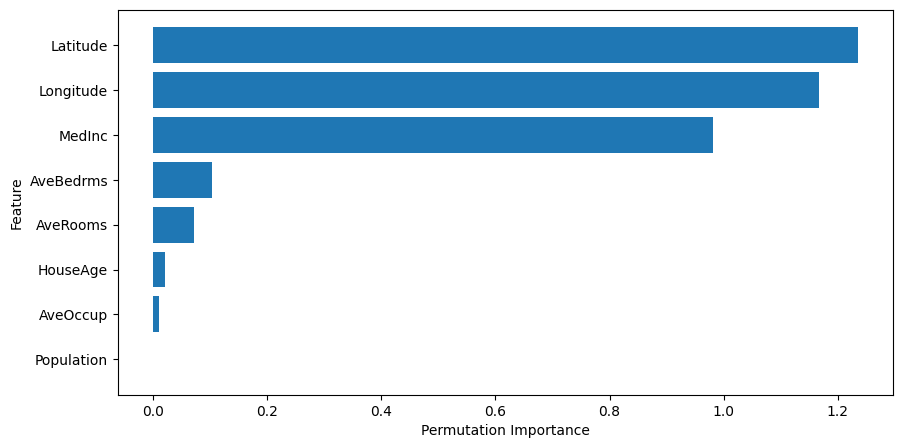

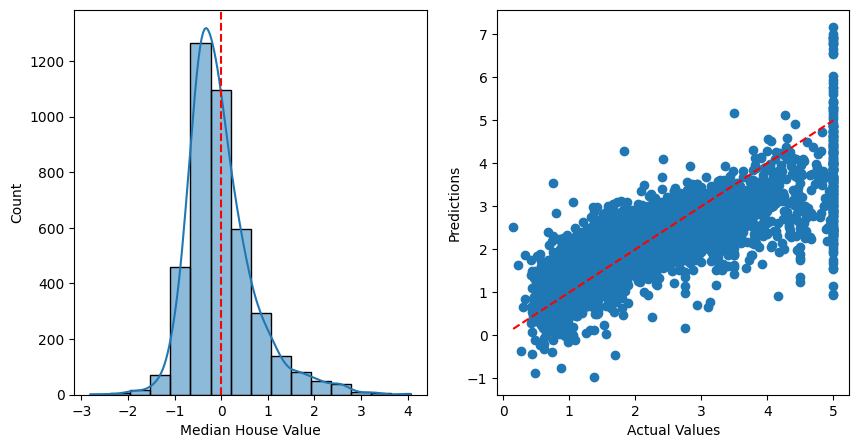

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import make_pipeline

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.coef_)
print(reg.intercept_)
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE", mean_absolute_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))

feature_importance = permutation_importance(reg, X_test, y_test)
features = np.array(feature_names)
sorted_idx = feature_importance.importances_mean.argsort()

plt.figure(figsize=(10, 5))
plt.barh(features[sorted_idx], feature_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")

##########Lots of code to refactor here to create other models. I have commented it out for now##########

# from sklearn import linear_model
# reg2 = linear_model.Lasso(alpha=0.5)
# reg2.fit(X_train, y_train)
# y2_pred = reg.predict(X_test)

# print(reg2.coef_)
# print(reg2.intercept_)
# print("RMSE", np.sqrt(mean_squared_error(y_test, y2_pred)))
# print("MAE", mean_absolute_error(y_test, y2_pred))
# print("R^2", r2_score(y_test, y2_pred))

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# reg3 = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
# reg3.fit(X_train, y_train)
# y3_pred = reg3.predict(X_test)

#print(reg3.coef_)
#print(reg3.intercept_)
# print("RMSE 3", np.sqrt(mean_squared_error(y_test, y3_pred)))
# print("MAE", mean_absolute_error(y_test, y3_pred))
# print("R^2", r2_score(y_test, y3_pred))

# corr_m = X.corr()

# high_corr_features = [(col1, col2, corr_m.loc[col1, col2])
#                       for col1 in corr_m.columns
#                       for col2 in corr_m.columns
#                       if col1 != col2 and abs(corr_m.loc[col1, col2]) > 0.8]
# colldf = pd.DataFrame(high_corr_features, columns=['col1', 'col2', 'corr'])

# print(colldf)

# W = pd.DataFrame(cal.data, columns=cal.feature_names).drop(columns=["AveBedrms"])
# v = cal.target
# W_train, W_test, v_train, v_test = train_test_split(W, v, test_size=0.20, random_state=0)
# model = LinearRegression()
# model.fit(W_train, v_train)
# v_pred = model.predict(W_test)

# print(model.coef_)
# print(model.intercept_)
# print("RMSE", np.sqrt(mean_squared_error(v_test, v_pred)))
# print("MAE", mean_absolute_error(v_test, v_pred))
# print("R^2", r2_score(v_test, v_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred, bins=16, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Median House Value')
#plt.show()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# sns.histplot(v_test - v_pred, bins=16, kde=True)
# plt.axvline(0, color='red', linestyle='--')
# #plt.show()

# plt.subplot(1, 2, 2)
# plt.scatter(v_test, v_pred)
# plt.plot([min(v_test), max(v_test)], [min(v_test), max(v_test)], color = 'red')
# plt.xlabel('Actual Values')
# plt.ylabel('Predictions')
# plt.show()

# plt.scatter(y_test, y3_pred)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
# plt.xlabel('Actual Values')
# plt.ylabel('Predictions')
# plt.show()



# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


SVC Accuracy Score 0.9649122807017544
ROC AUC Score 0.9623015873015873
Average Precision Score 0.9627599090318388
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[40  2]
 [ 2 70]]


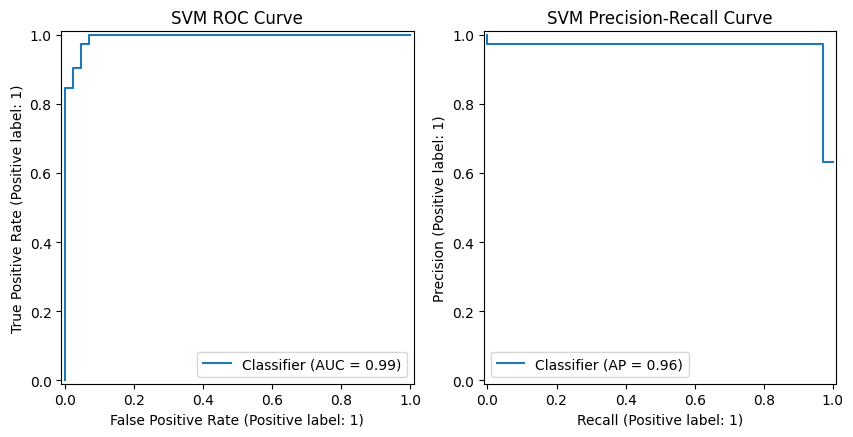

KNN Accuracy Score 0.956140350877193
ROC AUC Score 0.945436507936508
Average Precision Score 0.9422904483430798
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[38  4]
 [ 1 71]]
LR Accuracy Score 0.9824561403508771
ROC AUC Score 0.9761904761904762
Average Precision Score 0.972972972972973
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[40  2]
 [ 0 72]]


In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance


# Support Vector Machine
svc_model = SVC()
svc_model.fit(X_train_std, y_train)

y_pred = svc_model.predict(X_test_std)

print("SVC Accuracy Score",accuracy_score(y_test, y_pred))
print("ROC AUC Score",roc_auc_score(y_test, y_pred))
print("Average Precision Score",average_precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))
print(confusion_matrix(y_test, y_pred))

feature_importance = permutation_importance(svc_model, X_test_std, y_test)
features = np.array(feature_names)
sorted_idx = feature_importance.importances_mean.argsort()

#plt.figure(figsize=(10, 5))
# plt.barh(features[sorted_idx], feature_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.ylabel("Feature")
# plt.show()

y_score = svc_model.decision_function(X_test_std)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("SVM ROC Curve")
ax2.set_title("SVM Precision-Recall Curve")
RocCurveDisplay.from_predictions(y_test, y_score, ax=ax1)
PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=ax2)
plt.show()

# K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_std, y_train)

y_pred_KNN = KNN.predict(X_test_std)

print("KNN Accuracy Score", accuracy_score(y_test, y_pred_KNN))
print("ROC AUC Score",roc_auc_score(y_test, y_pred_KNN))
print("Average Precision Score",average_precision_score(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN, target_names=data.target_names))
print(confusion_matrix(y_test, y_pred_KNN))

# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train_std, y_train)

y_pred_LR = LR.predict(X_test_std)

print("LR Accuracy Score", accuracy_score(y_test, y_pred_LR))
print("ROC AUC Score",roc_auc_score(y_test, y_pred_LR))
print("Average Precision Score",average_precision_score(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR, target_names=data.target_names))
print(confusion_matrix(y_test, y_pred_LR))